In [38]:
import numpy as np
import pandas as pd

# Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Training
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [39]:
df = pd.read_csv('train.csv')

In [40]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [41]:
# Checking is there is any duplicate value

df.duplicated().sum()

0

In [42]:
df.shape

(891, 12)

In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
df.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C


In [45]:
# Removing Unwanted features

Columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

# Deleting the rows having empty features cols

df.dropna( inplace=True, axis=0)

In [46]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [47]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<h1> Data Analysis</h1>

In [48]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

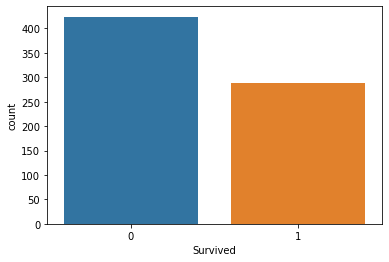

In [49]:
# Visualizing how many survived

sns.countplot(data=df, x='Survived')


<b>Observation :</b> More people died compared to survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

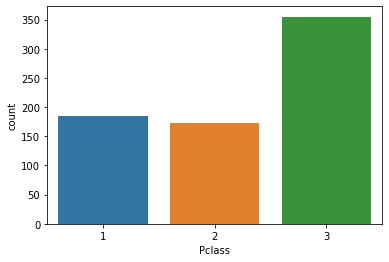

In [50]:
# Visulizing the Pclass 

sns.countplot(data = df, x = 'Pclass')

<b>Observation : </b> Class First : Meduim Travlers, Class second : Least Travelers, Third Class : Most Travelers

<AxesSubplot:xlabel='Pclass', ylabel='count'>

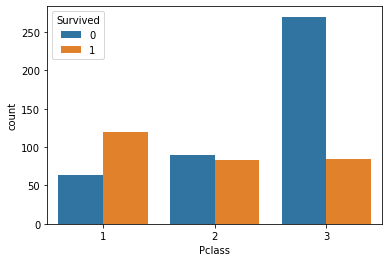

In [51]:
#  Distribution of surviver and non-survivers per Class

sns.countplot(data=df, x='Pclass', hue = 'Survived')

Observations

Class 2 had slightly less people than class 1. class 3 had the most people. Class one registered more survivers, class 2 had almost as many survivers as non-survivers and class 3 registered the highest number of deaths.

In [52]:
# We are going bundel ages into four groups

def ages(x):
    if x <=20:
        return '0-20'
    
    elif x<=40:
        return '21-40'

    elif x <= 60:
        return '41-60'
    else:
        return '61-80'

df['Age']  = df.Age.apply(ages) 

<AxesSubplot:xlabel='Age', ylabel='count'>

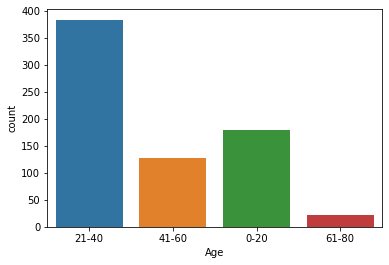

In [53]:
#How many people in each age bracket did we have onboard

sns.countplot(data=df, x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='count'>

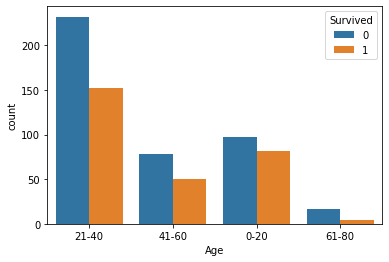

In [54]:
#How many people survived per Age Bracket
sns.countplot(data = df, x = 'Age', hue = 'Survived')

Observations

Based on the data, the number of survivers per age group is directly proportional to the amount of people per said Age group.

However, it is important to note that younger people between 0-40, survived more than the latter

<AxesSubplot:xlabel='SibSp', ylabel='count'>

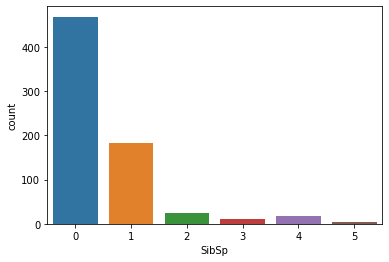

In [55]:
# How many people boaded per SibSp group
sns.countplot(data=df, x='SibSp')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

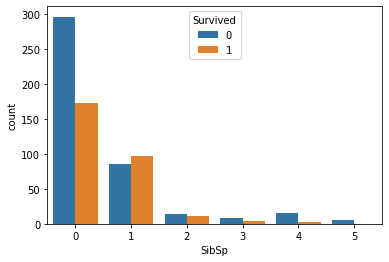

In [56]:
# How many people boaded per SibSp group Survived

sns.countplot(data =df, x='SibSp', hue='Survived')

Observations

People with no one survived more than people who boarded with relatives

There is a negative corelation beween number of Siblings and number of survivers

In [57]:
#Let us see how many passengers survived and how many didn't, based on Parch
df.groupby(['Survived', 'Parch']).size()

Survived  Parch
0         0        335
          1         49
          2         29
          3          2
          4          4
          5          4
          6          1
1         0        184
          1         61
          2         39
          3          3
          5          1
dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

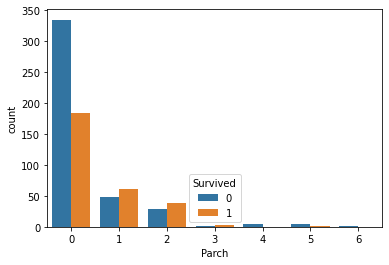

In [58]:
#We can visualize the distribution of people besed on Parch 
sns.countplot(data=df, x='Parch', hue = 'Survived' )

In [59]:
# Bundel fares into 5 groups

def fare(x):
    if x <=110:
        return 'Bronze'
    elif x<=220:
        return 'Silver'
    elif x<=330:
        return 'Diamond'
    elif x<=440:
        return  'Gold'
    else:
        return 'PLatimun'

df['Fare'] = df.Fare.apply(fare)

<AxesSubplot:xlabel='Fare', ylabel='count'>

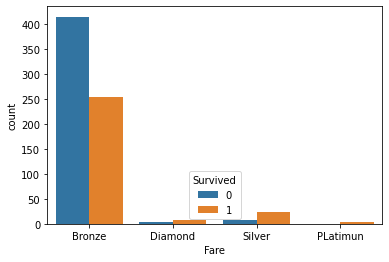

In [60]:
#Let us visualize how stacked each Fare group is
sns.countplot(data=df, x='Fare', hue = 'Survived')

Observation

As expected, The more people opted for cheap fare compared to those who spent more on fare. The data provides a clear inverse proportion between number of people and the amount spent per group with Bronze tickets registering more people followed by Silver, Diamond and finally Platinum, respectively

Data shows that all the Platinum passengers(3) survived, Over 70% of all people who travelled Diamond as well as Silver survived.

However, more than half of all Bronze passengers did not survive


<AxesSubplot:xlabel='Sex', ylabel='count'>

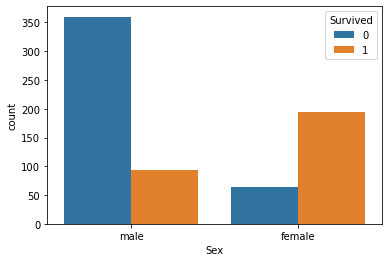

In [61]:
#Visualization of the quantifications between the 2 Sexes
sns.countplot(data= df, x= 'Sex', hue = 'Survived')

Observations

Majority of the paassengers were male, whose numnber doubled that of females.

However the number of females who survived the accident doubled that of doubles that of the males

<h1>Model Development</h1>

In [62]:
# Feature Seledtion

df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:>

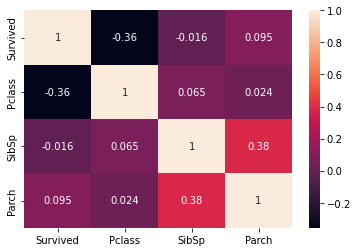

In [63]:
# we need to  find the correlation between features(columns) in order to choose the ones that will be more useful.

correlation = df.corr()

# we visualize the correlation 

sns.heatmap(data=correlation, annot=True)

In [64]:
# Trainnig and spliting

X = df.drop('Survived', axis =1)

y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [65]:
df.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
779,1,1,female,41-60,0,1,Silver,S


In [68]:
#Let us differentiate categorical for numerical data

cat = ['Age', 'Fare', 'Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

trf1 =  ColumnTransformer(transformers=[('trf1', categorical_transformer, cat)])

now that the pre processing bit is done, we can contiue onto building the models

Trainig Models

In [71]:
# LogisticRegression

trf2 = LogisticRegression()

pipe  =Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

# training pipe line

pipe.fit(X_train, y_train)
y_predect = pipe.predict(X_test)

acc_scores = accuracy_score(y_test, y_predect)

print('model is '+ str(round((acc_scores*100), 2)) + ' accurate')

model is 76.97 accurate


In [74]:
# Decision Tree

model_second = DecisionTreeClassifier()

tree_pipe_line = Pipeline([
    ('trf1', trf1),
    ('trf2', model_second)
])

tree_pipe_line.fit(X_train, y_train)

Tree_y_pred = tree_pipe_line.predict(X_test)

tree_acc_score = accuracy_score(y_test, Tree_y_pred)

print('model is '+ str(round((tree_acc_score*100), 2)) + ' accurate')

model is 75.28 accurate


In [75]:
# KNN tree

model_third = KNeighborsClassifier(n_neighbors=5)

k_pipeline = Pipeline([
    ('trf1', trf1),
    ('trf2', model_third)
])

k_pipeline.fit(X_train, y_train)

k_prediction = k_pipeline.predict(X_test)

k_scores = accuracy_score(y_test, k_prediction)

print('model is '+ str(round((k_scores*100), 2)) + ' accurate')

model is 77.53 accurate


<b> We are going to use KNN because it is most accurate</b>